# Part I - (Loan Data from Prosper)
## by (Alex Wang)

## Introduction

> The dataset contains 113,937 loans, with 81 variables for each loan, including loan amount, borrower interest rate (or interest rate), current loan status, borrower income, and more. 

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# load data
df = pd.read_csv('Loan_Data_Prosper.csv')

In [4]:
#check data 
df.shape

(113937, 81)

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.info

<bound method DataFrame.info of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000

In [7]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [9]:
# Because there are too many fields, it is necessary to list by type and evaluate the field attributes
print(df.dtypes.unique())
print('-----------------------------------------------')
print('Object features: {}'.format(df.dtypes[df.dtypes=='O'].count()))
print(df.dtypes[df.dtypes=='O'])
print('-----------------------------------------------')
print('Object features: {}'.format(df.dtypes[df.dtypes=='int64'].count()))
print(df.dtypes[df.dtypes=='int64'])
print('-----------------------------------------------')
print('Object features: {}'.format(df.dtypes[df.dtypes=='float64'].count()))
print(df.dtypes[df.dtypes=='float64'])
print('-----------------------------------------------')
print('Object features: {}'.format(df.dtypes[df.dtypes=='bool'].count()))
print(df.dtypes[df.dtypes=='bool'])

[dtype('O') dtype('int64') dtype('float64') dtype('bool')]
-----------------------------------------------
Object features: 17
ListingKey                 object
ListingCreationDate        object
CreditGrade                object
LoanStatus                 object
ClosedDate                 object
ProsperRating (Alpha)      object
BorrowerState              object
Occupation                 object
EmploymentStatus           object
GroupKey                   object
DateCreditPulled           object
FirstRecordedCreditLine    object
IncomeRange                object
LoanKey                    object
LoanOriginationDate        object
LoanOriginationQuarter     object
MemberKey                  object
dtype: object
-----------------------------------------------
Object features: 11
ListingNumber                 int64
Term                          int64
ListingCategory (numeric)     int64
OpenRevolvingAccounts         int64
LoanCurrentDaysDelinquent     int64
LoanMonthsSinceOrigination    int

> Data field property description
>- ListingKey, ListingNumber: ListingKey and ListingNumber: indicates the ID of a list and can be used as an index.
>- CreditGrade: Only available for listings from 2009 or earlier.
>- LoanStatus: [Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.]
>- [EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn]: Only for listings after July 2009.
>- [ProsperRating(numeric), ProsperRating(Alpha), ProsperScore]: Only for listings after July 2009.
>- [CurrentlyInGroup, GroupKey]: affiliation to specific groups.

### What is the structure of your dataset?

> There are 113,937 load data in the dataset with 81 features (Object: 17; Int64: 11; Float64: 50; Boolean:3). The majority (61 variables) are numeric in nature.
### What is/are the main feature(s) of interest in your dataset?

While the dataset provides a range of features for exploration, this analysis focuses primarily on investigating the BorrowerAPR and BorrowerRate variables, in addition to other relevant properties. We try to answer the following questions:

>- What factors affect a borrower's APR or interest rate?
>- What will affect the original loan amount?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Key attributes that play a crucial role in supporting the analysis of BorrowerAPR and BorrowerRate include:

|Column      | Description |
| :---       | :---: |
|**Term**       | The length of the loan expressed in months.
| **LoanStatus** | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
|**BorrowerAPR**            | The Borrower's Annual Percentage Rate (APR) for the loan.
|**BorrowerRate**       | The Borrower's interest rate for this loan. 
|**ProsperRating (Alpha)**| The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
|**ListingCategory** | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
|**EmploymentStatus** 	  | The employment status of the borrower at the time they posted the listing.
|**IsBorrowerHomeowner**  | A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. TRUE or FALSE
|**IncomeRange** | The income range of the borrower at the time the listing was created.
|**DebtToIncomeRatio** | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
|**StatedMonthlyIncome** | The monthly income the borrower stated at the time the listing was created.
|**LoanOriginalAmount** | The original amount of the loan.
| **MonthlyLoanPayment** | The scheduled monthly loan payment.

### Build the modified data set for analysis



In [10]:
df_info = df[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate',
            'ProsperRating (Alpha)','ListingCategory (numeric)','EmploymentStatus',
            'IsBorrowerHomeowner','IncomeRange','DebtToIncomeRatio',
            'LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment']].copy()
df_info.head()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment
0,E33A3400205839220442E84,36,Completed,0.16516,0.1580,NaN,0,Self-employed,True,"$25,000-49,999",0.17,9425,3083.333333,330.43
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,A,2,Employed,False,"$50,000-74,999",0.18,10000,6125.000000,318.93
2,6954337960046817851BCB2,36,Completed,0.28269,0.2750,NaN,0,Not available,False,Not displayed,0.06,3001,2083.333333,123.32
3,A0393664465886295619C51,36,Current,0.12528,0.0974,A,16,Employed,True,"$25,000-49,999",0.15,10000,2875.000000,321.45
4,A180369302188889200689E,36,Current,0.24614,0.2085,D,2,Employed,True,"$100,000+",0.26,15000,9583.333333,563.97


In [11]:
# Rename field name
df_info.rename(columns={'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory'}, inplace=True)
df_info.head()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment
0,E33A3400205839220442E84,36,Completed,0.16516,0.1580,NaN,0,Self-employed,True,"$25,000-49,999",0.17,9425,3083.333333,330.43
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,A,2,Employed,False,"$50,000-74,999",0.18,10000,6125.000000,318.93
2,6954337960046817851BCB2,36,Completed,0.28269,0.2750,NaN,0,Not available,False,Not displayed,0.06,3001,2083.333333,123.32
3,A0393664465886295619C51,36,Current,0.12528,0.0974,A,16,Employed,True,"$25,000-49,999",0.15,10000,2875.000000,321.45
4,A180369302188889200689E,36,Current,0.24614,0.2085,D,2,Employed,True,"$100,000+",0.26,15000,9583.333333,563.97


In [12]:
# check duplicated
df_info.duplicated().value_counts()

False    113066
True        871
dtype: int64

- found duplicated data , delete them

In [13]:
df_info = df_info.drop_duplicates()
df_info.duplicated().value_counts()

False    113066
dtype: int64

In [14]:
# check null value
df_info.isnull().sum()

LoanKey                    0
Term                       0
LoanStatus                 0
BorrowerAPR               25
BorrowerRate               0
ProsperRating          29084
ListingCategory            0
EmploymentStatus        2255
IsBorrowerHomeowner        0
IncomeRange                0
DebtToIncomeRatio       8472
LoanOriginalAmount         0
StatedMonthlyIncome        0
MonthlyLoanPayment         0
dtype: int64

- found Nan data , delete them

In [15]:
df_info=df_info.dropna()
df_info.isnull().sum()

LoanKey                0
Term                   0
LoanStatus             0
BorrowerAPR            0
BorrowerRate           0
ProsperRating          0
ListingCategory        0
EmploymentStatus       0
IsBorrowerHomeowner    0
IncomeRange            0
DebtToIncomeRatio      0
LoanOriginalAmount     0
StatedMonthlyIncome    0
MonthlyLoanPayment     0
dtype: int64

In [16]:
# set LoanKey as index key
df_info.set_index('LoanKey',inplace=True)

In [17]:
df_info.shape

(76768, 13)

### My dataset Structure(df_info)
>- The number of rows in the dataset is 76768 and the number of columns in the dataset is 13.

### My dataset main feature(s) of interest
>- LoanKey (Index)                      
>- Term                         
>- LoanStatus                   
>- BorrowerAPR                  
>- BorrowerRate                 
>- ProsperRating (Alpha)        
>- ListingCategory (numeric)    
>- EmploymentStatus             
>- IsBorrowerHomeowner          
>- IncomeRange                  
>- DebtToIncomeRatio            
>- LoanOriginalAmount
>- StatedMonthlyIncome
>- MonthlyLoanPayment 

In [18]:
df_info.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment
LoanKey,,,,,,,,,,,,,
9E3B37071505919926B1D82,36,Current,0.12016,0.0920,A,2,Employed,False,"$50,000-74,999",0.18,10000,6125.000000,318.93
A0393664465886295619C51,36,Current,0.12528,0.0974,A,16,Employed,True,"$25,000-49,999",0.15,10000,2875.000000,321.45
A180369302188889200689E,36,Current,0.24614,0.2085,D,2,Employed,True,"$100,000+",0.26,15000,9583.333333,563.97
C3D63702273952547E79520,60,Current,0.15425,0.1314,B,1,Employed,True,"$100,000+",0.36,15000,8333.333333,342.37
CE963680102927767790520,36,Current,0.31032,0.2712,E,1,Employed,False,"$25,000-49,999",0.27,3000,2083.333333,122.67


## Univariate Exploration

>- Exploration Term

In [19]:
df_info.Term.value_counts()

36    52505
60    22849
12     1414
Name: Term, dtype: int64

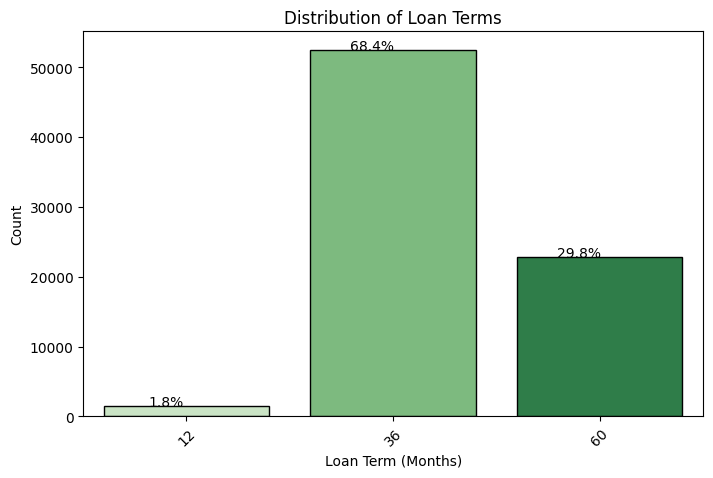

In [20]:
# Draw a statistical graph of the distribution of loan maturities
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df_info, x='Term', palette = 'Greens', edgecolor='black')

plt.xlabel('Loan Term (Months)')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution of Loan Terms')  # Title for the plot

# Show percentage labels
total_count = len(df_info)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / total_count)
    x = i.get_x() + i.get_width() / 2 - 0.1
    y = i.get_height() + 20
    ax.annotate(percentage, (x, y), fontsize=10, ha='center')
    
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()  # Display the plot

>-There are 3 loan terms available. The most commonly chosen term is 36 months, although some borrowers also have a clear preference for a 60-month term.

### LoanStatus

>- What categories do most loans fall into?



In [21]:
df_info['LoanStatus'].value_counts() 

Current                   51712
Completed                 17691
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        716
Past Due (31-60 days)       325
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       242
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [22]:
# Plot the function of the Bar distribution
def BarGraph(df, var, order=None, figsize=[16,8], title=''):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the barplot
    type_count = df[var].value_counts()
    sns.barplot(x=type_count, y=type_count.index, order=order, color='green')
    
    # Add title
    ax.set_title(title)
    
    # Add X and Y labels and format them 
    ax.set_xlabel('Count', fontsize=12, weight="bold")
    ax.set_ylabel(var, fontsize=12, weight="bold")
    
    
    plt.show()

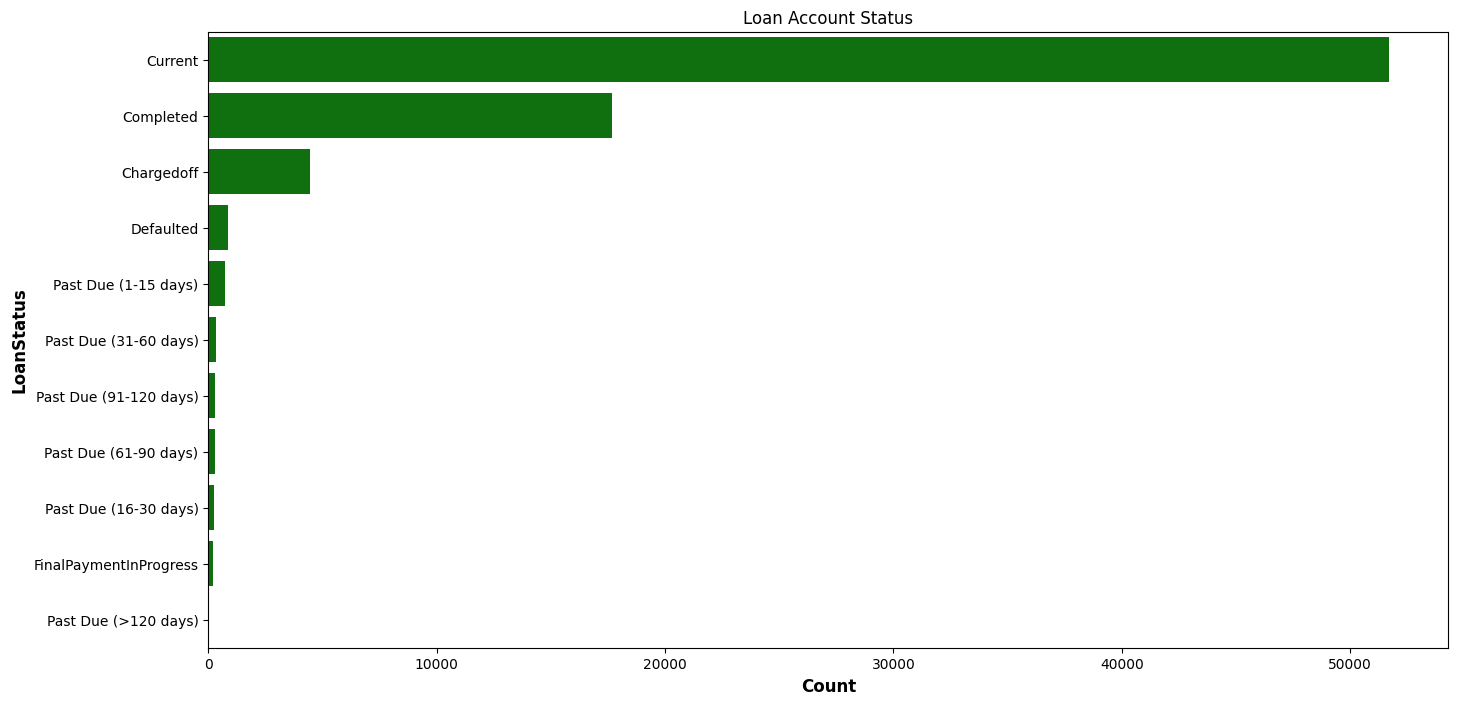

In [23]:
BarGraph(df_info, 'LoanStatus', title='Loan Account Status')

>- The chart above shows that most of the loans in the dataset fall into the "current" category, followed by "completed," "charge-off," "delinquent," and "past due (1-15 days)."

### Borrower annual rate

In [24]:
df_info.BorrowerAPR.describe()

count    76768.000000
mean         0.223978
std          0.079291
min          0.045830
25%          0.162590
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64

In [25]:
# Plot the function of the histogram distribution
def HistGraph(df, var, interval=20, figsize=[16,8], title=''):
    # Set intervals for bins
    bins = np.arange(df[var].min(), df[var].max() + interval, interval)
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the histogram
    ax.hist(df[var], bins=bins, edgecolor='black', color='green', alpha=0.7)
    
    # Add a vertical line for the median
    median = df[var].median()
    ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    # Add title
    ax.set_title(title)
    
    # Add X and Y labels and format them 
    ax.set_xlabel(var, fontsize=12, weight="bold")
    ax.set_ylabel('Frequency', fontsize=12, weight="bold")
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a legend for the median line
    ax.legend(loc='upper right')
    
    plt.show()

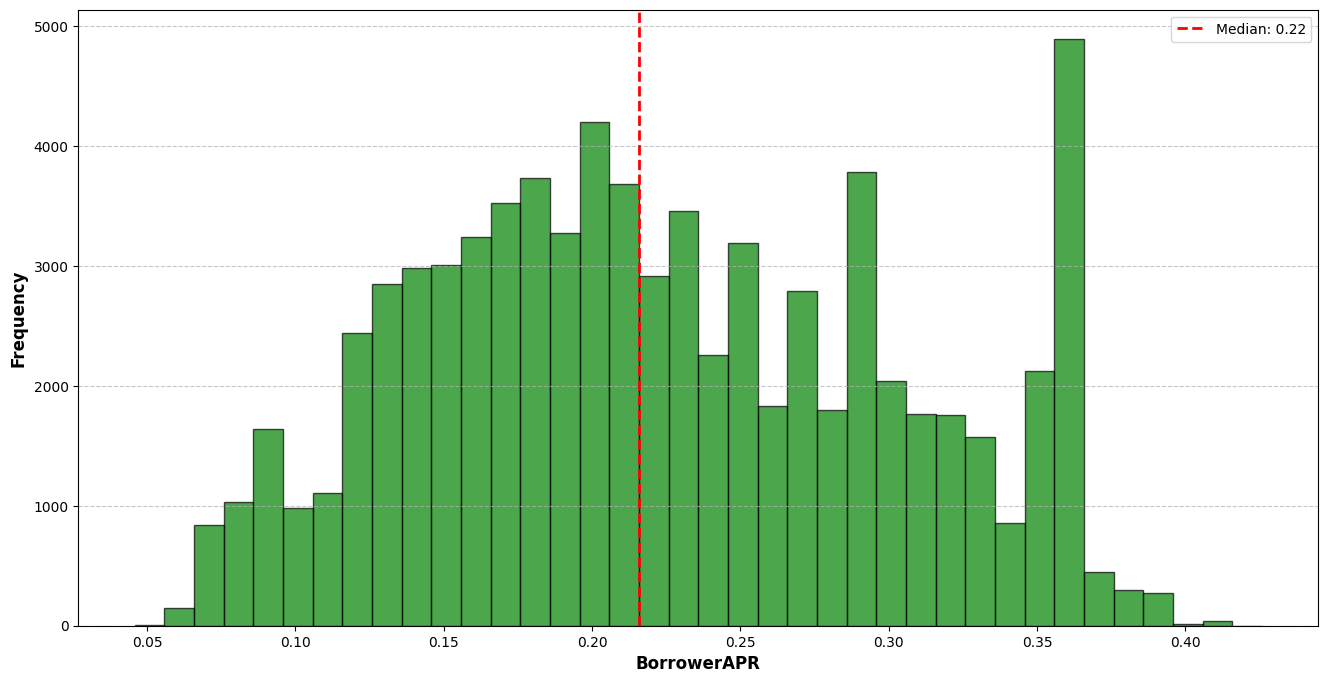

In [26]:
# Histogram of all data
HistGraph(df_info, 'BorrowerAPR', 0.01) 

>- A higher borrower APR indicates a higher interest rate on borrowed funds, resulting in higher interest payments.
>- In the BorrowerAPR distribution map, there is a prominent peak near 0.09, 0.23, 0.25, 0.27, 0.29, a small peak near 0.18, and a significant peak near 0.36. Very few people have an APR of more than 0.4.

### BorrowerRate

In [27]:
df_info.BorrowerRate.describe()

count    76768.000000
mean         0.193653
std          0.074018
min          0.040000
25%          0.134900
50%          0.184500
75%          0.254900
max          0.360000
Name: BorrowerRate, dtype: float64

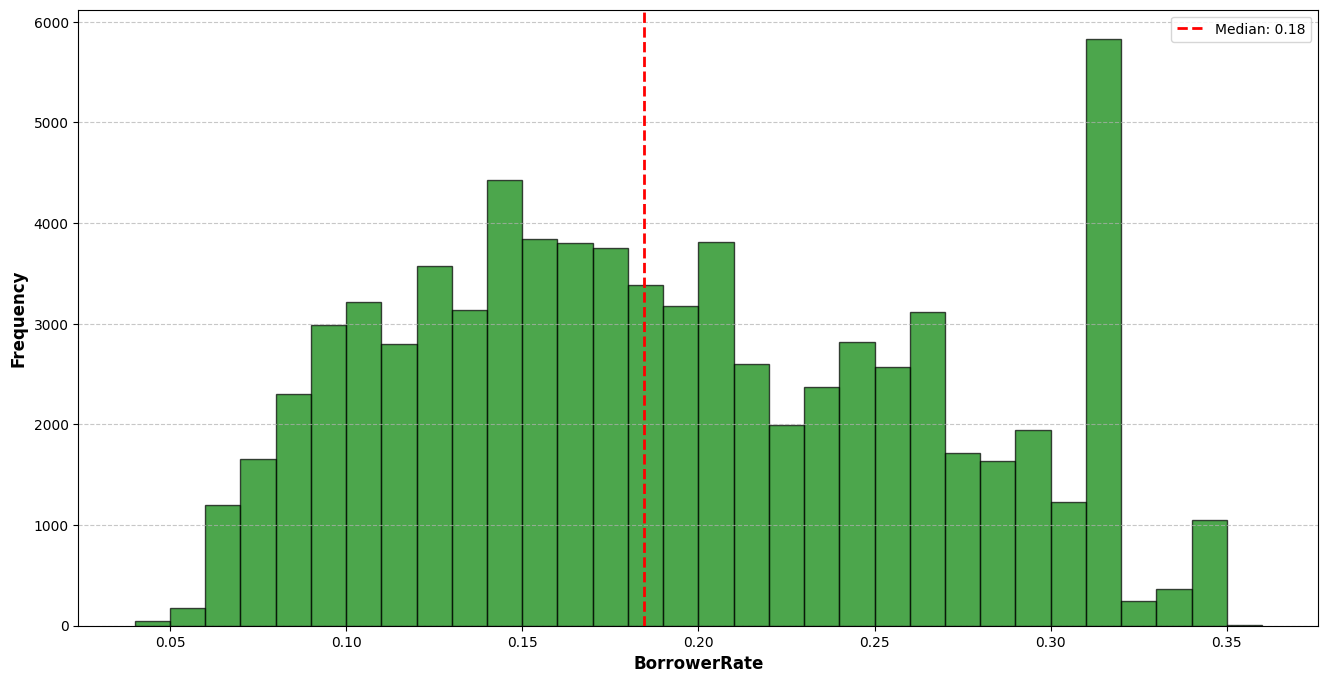

In [28]:
HistGraph(df_info, 'BorrowerRate', 0.01)

>- The distribution of BorrowerRate is multimodal, with an outstanding peak of about 0.32. Rates above 0.35 are rare, with a median of 0.18.

### ProsperRating

In [29]:
df_info.ProsperRating.value_counts()

C     16671
B     14444
A     13555
D     12724
E      8543
HR     5722
AA     5109
Name: ProsperRating, dtype: int64

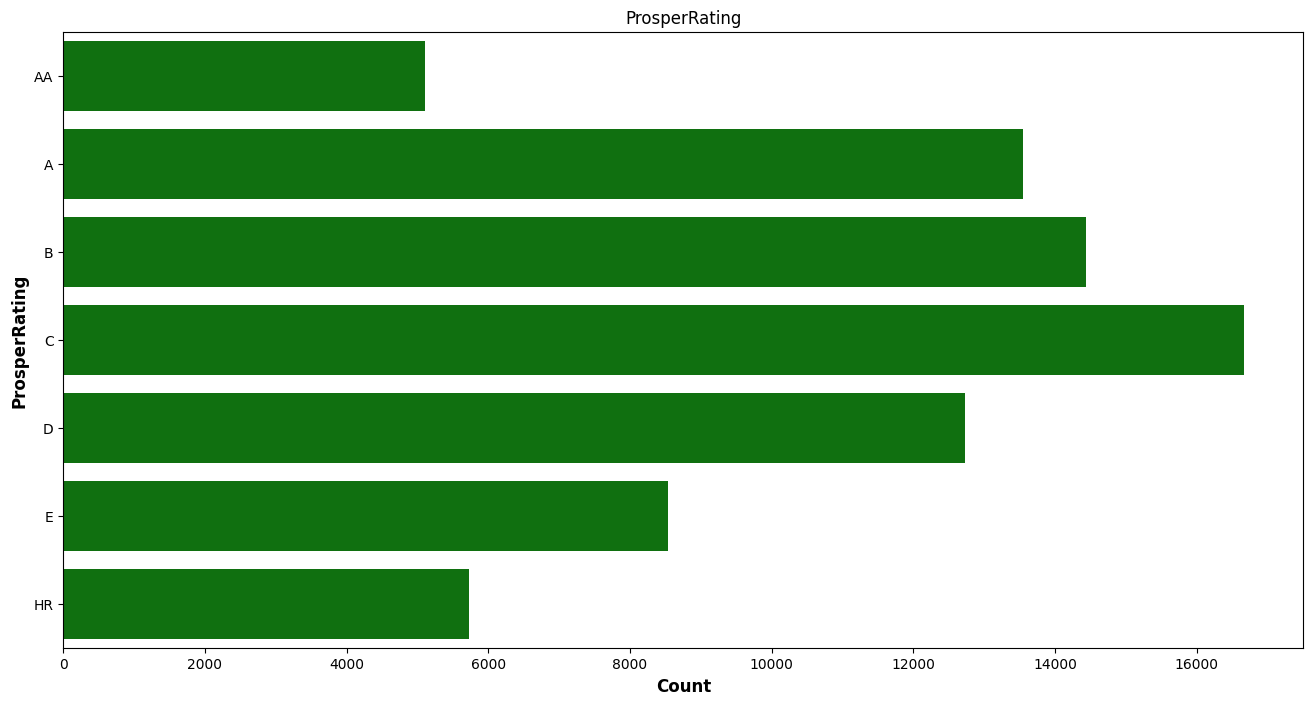

In [30]:
order=['AA','A','B','C','D','E','HR']
BarGraph(df_info, 'ProsperRating', order=order, title='ProsperRating')

>- The most common ProsperRating are C, B, A, and D

### ListingCategory

In [31]:
df_info.ListingCategory.value_counts()

1     49099
7      8334
2      6326
3      3626
6      2038
13     1779
15     1390
14      794
18      785
20      724
19      718
16      289
5       201
11      198
8       188
9        83
10       82
17       50
12       45
0        19
Name: ListingCategory, dtype: int64

In [32]:
listing_categories = {0 : 'Not Available', 
                1 : 'Debt Consolidation', 
                2 : 'Home Improvement', 
                3 : 'Business', 
                4 : 'Personal Loan', 
                5 : 'Student Use', 
                6 : 'Auto', 
                7 : 'Other', 
                8 : 'Baby&Adoption', 
                9 : 'Boat', 
                10 : 'Cosmetic Procedure', 
                11 : 'Engagement Ring', 
                12 : 'Green Loans', 
                13 : 'Household Expenses', 
                14 : 'Large Purchases', 
                15 : 'Medical/Dental', 
                16 : 'Motorcycle', 
                17 : 'RV', 
                18 : 'Taxes', 
                19 : 'Vacation', 
                20 : 'Wedding Loans'}

In [33]:
df_info['ListingCategory'] = df_info['ListingCategory'].replace(to_replace=listing_categories)

In [34]:
df_info.ListingCategory.value_counts()

Debt Consolidation    49099
Other                  8334
Home Improvement       6326
Business               3626
Auto                   2038
Household Expenses     1779
Medical/Dental         1390
Large Purchases         794
Taxes                   785
Wedding Loans           724
Vacation                718
Motorcycle              289
Student Use             201
Engagement Ring         198
Baby&Adoption           188
Boat                     83
Cosmetic Procedure       82
RV                       50
Green Loans              45
Not Available            19
Name: ListingCategory, dtype: int64

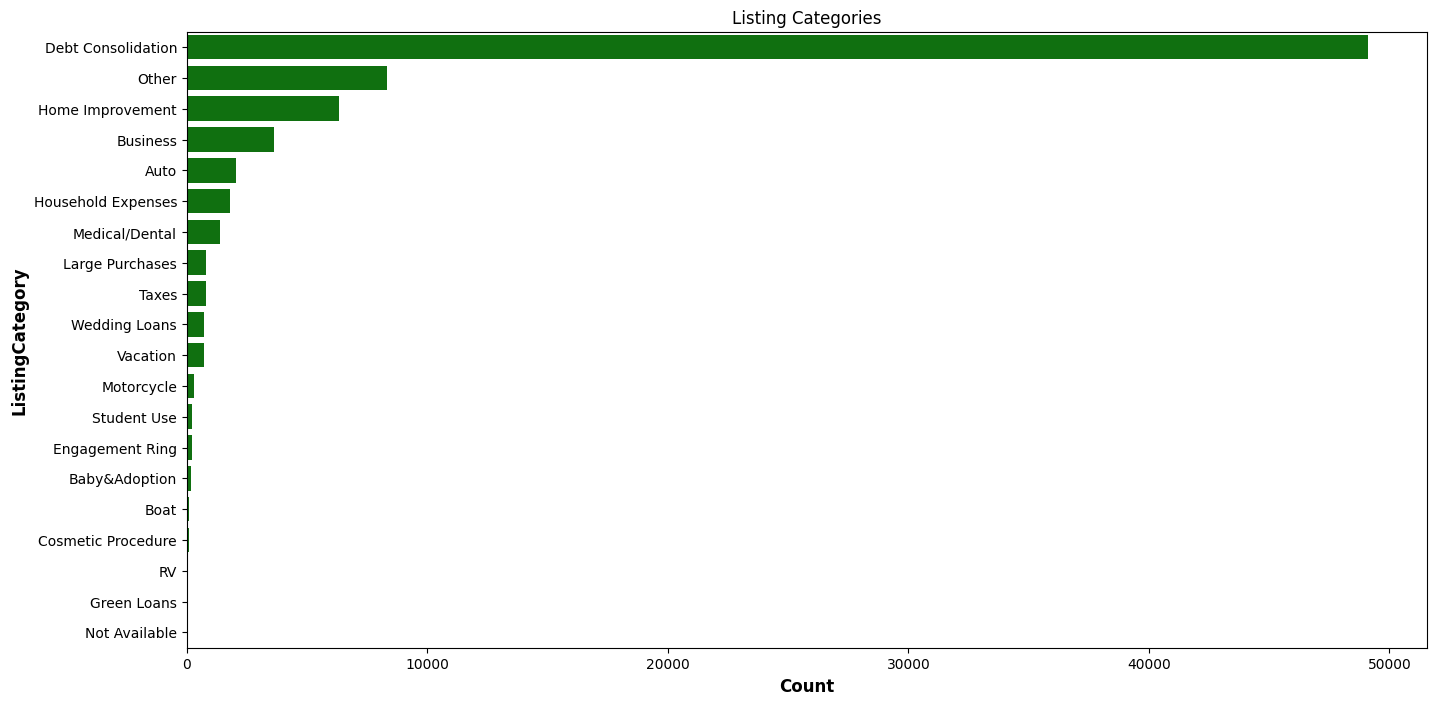

In [35]:
# ListingCategory BarGraph
BarGraph(df_info, 'ListingCategory', title='Listing Categories')

>- As can be seen from the chart above, quite a few individuals are taking out loans for the purpose of "debt consolidation," primarily to manage and consolidate their existing debt.

### EmploymentStatus

In [36]:
df_info.EmploymentStatus.value_counts()

Employed         65160
Full-time         7584
Other             3462
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

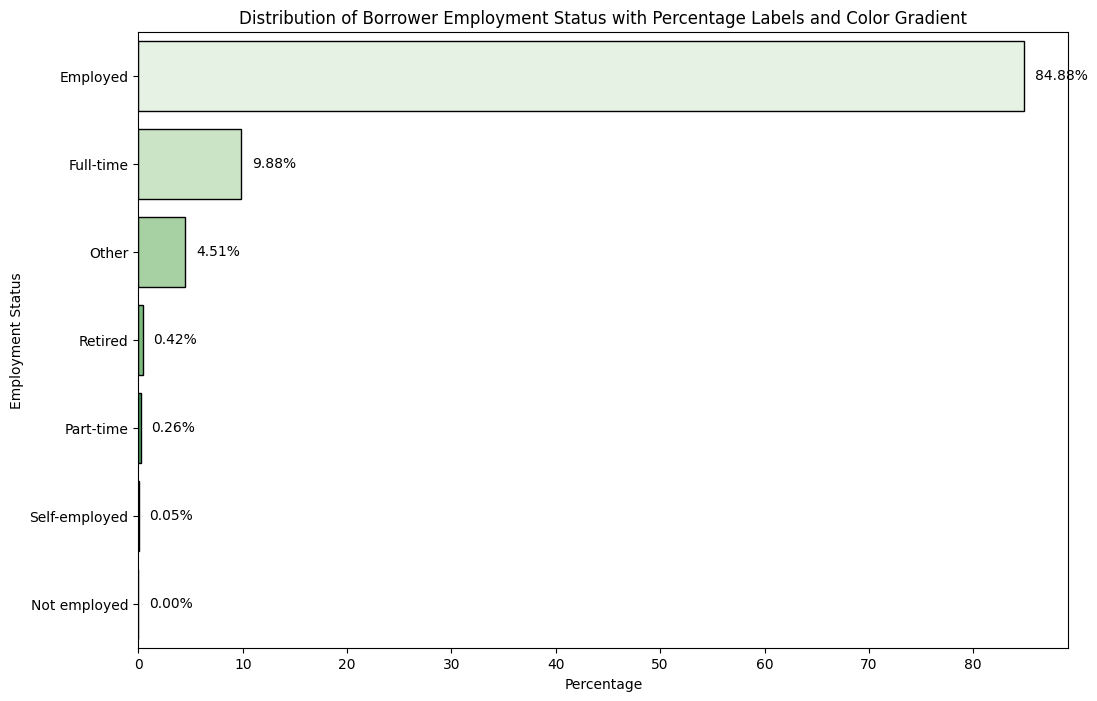

In [37]:
# Calculate the percentage of borrowers in each employment status category
percentage_data = (df_info['EmploymentStatus'].value_counts() / len(df_info)) * 100

# Create a color palette with a gradient
color_palette = sns.color_palette("Greens", len(percentage_data))

# Sort the data by count to maintain color consistency
percentage_data = percentage_data.sort_values(ascending=False)

# Create the bar chart with color gradient
plt.figure(figsize=(12, 8))
bars = sns.barplot(y=percentage_data.index, x=percentage_data.values, palette=color_palette, edgecolor='black')

# Add percentage labels on the bars
for bar, percentage in zip(bars.patches, percentage_data):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.xlabel('Percentage')
plt.ylabel('Employment Status')
plt.title('Distribution of Borrower Employment Status with Percentage Labels and Color Gradient')
plt.show()

>- Most loan borrowers are employed, which is a logical trend as a source of income is needed to repay loans.

### IsBorrowerHomeowner

In [38]:
df_info.IsBorrowerHomeowner.value_counts()

True     41676
False    35092
Name: IsBorrowerHomeowner, dtype: int64

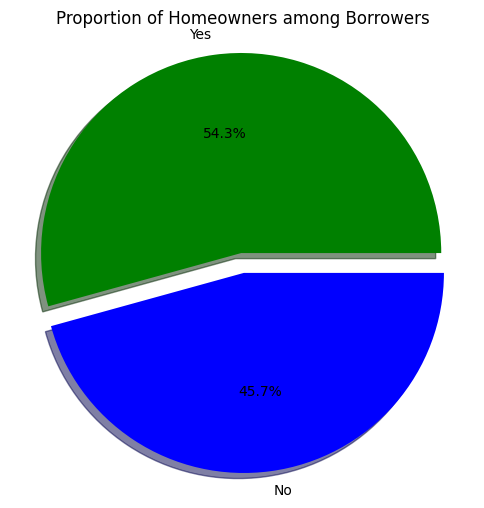

In [39]:
# Pie chart is used to show the proportion of homeowners
# Define the labels
labels = ['Yes', 'No']  
plt.figure(figsize=(6, 6))
colors = ['green', 'blue']
explode = (0.1, 0)  # Explode the 'Yes' slice for emphasis

plt.pie(df_info['IsBorrowerHomeowner'].value_counts(), labels=labels, autopct='%0.1f%%', colors=colors, explode=explode, shadow=True)
plt.title('Proportion of Homeowners among Borrowers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

>- A slight majority of borrowers are homeowners.

### IncomeRange

In [40]:
df_info.IncomeRange.value_counts()

$50,000-74,999    23756
$25,000-49,999    21795
$100,000+         13889
$75,000-99,999    13519
$1-24,999          3808
Not employed          1
Name: IncomeRange, dtype: int64

In [41]:
# Create ordinal categories for income ranges
ordinal_income_ranges = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_income_ranges)
df_info['IncomeRange'] = df_info['IncomeRange'].astype(income_order)
df_info['IncomeRange']

LoanKey
9E3B37071505919926B1D82    $50,000-74,999
A0393664465886295619C51    $25,000-49,999
A180369302188889200689E         $100,000+
C3D63702273952547E79520         $100,000+
CE963680102927767790520    $25,000-49,999
                                ...      
9BD7367919051593140DB62    $50,000-74,999
62D93634569816897D5A276    $75,000-99,999
DD1A370200396006300ACA0    $25,000-49,999
589536350469116027ED11B    $25,000-49,999
00AF3704550953269A64E40    $50,000-74,999
Name: IncomeRange, Length: 76768, dtype: category
Categories (6, object): ['$100,000+' < '$75,000-99,999' < '$50,000-74,999' < '$25,000-49,999' < '$1-24,999' < '$0']

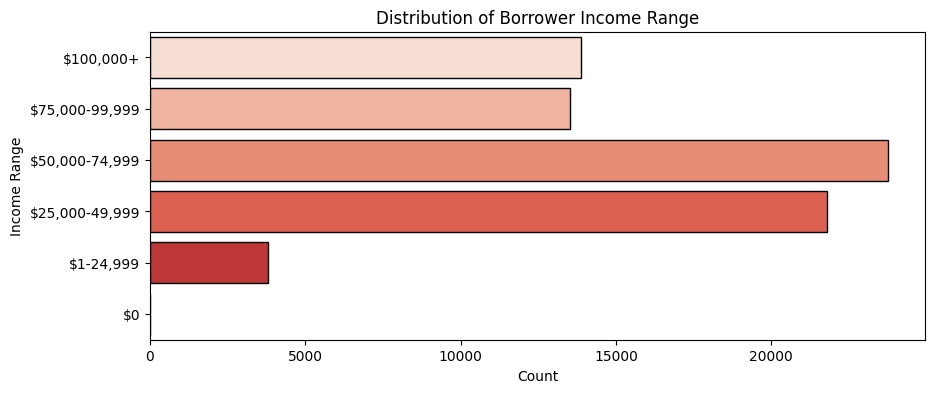

The median income category = $50,000-74,999


In [42]:
# Plot a horizontal bar chart for the distribution of LoanStatus
plt.figure(figsize=[10, 4])  

sns.countplot(data=df_info, y='IncomeRange', palette='Reds', edgecolor='black') 
# Label for the x-axis
plt.xlabel('Count')  
# Label for the y-axis
plt.ylabel('Income Range') 
# Title for the plot
plt.title('Distribution of Borrower Income Range')  

# Display the plot
plt.show()  


# Median income
median_income = df_info['IncomeRange']
median_income = median_income.sort_values().reset_index()['IncomeRange'][76768/2]
print('The median income category = {}'.format(median_income))

>- The median IncomeRange (Also the most common) is `$50,000` - `$74,999`.

### DebtToIncomeRatio

In [43]:
df_info.DebtToIncomeRatio.value_counts()

0.18    3184
0.22    2974
0.17    2728
0.14    2681
0.21    2545
        ... 
1.54       1
3.81       1
4.54       1
1.93       1
2.53       1
Name: DebtToIncomeRatio, Length: 259, dtype: int64

In [44]:
df_info.DebtToIncomeRatio.describe()

count    76768.000000
mean         0.258692
std          0.319727
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

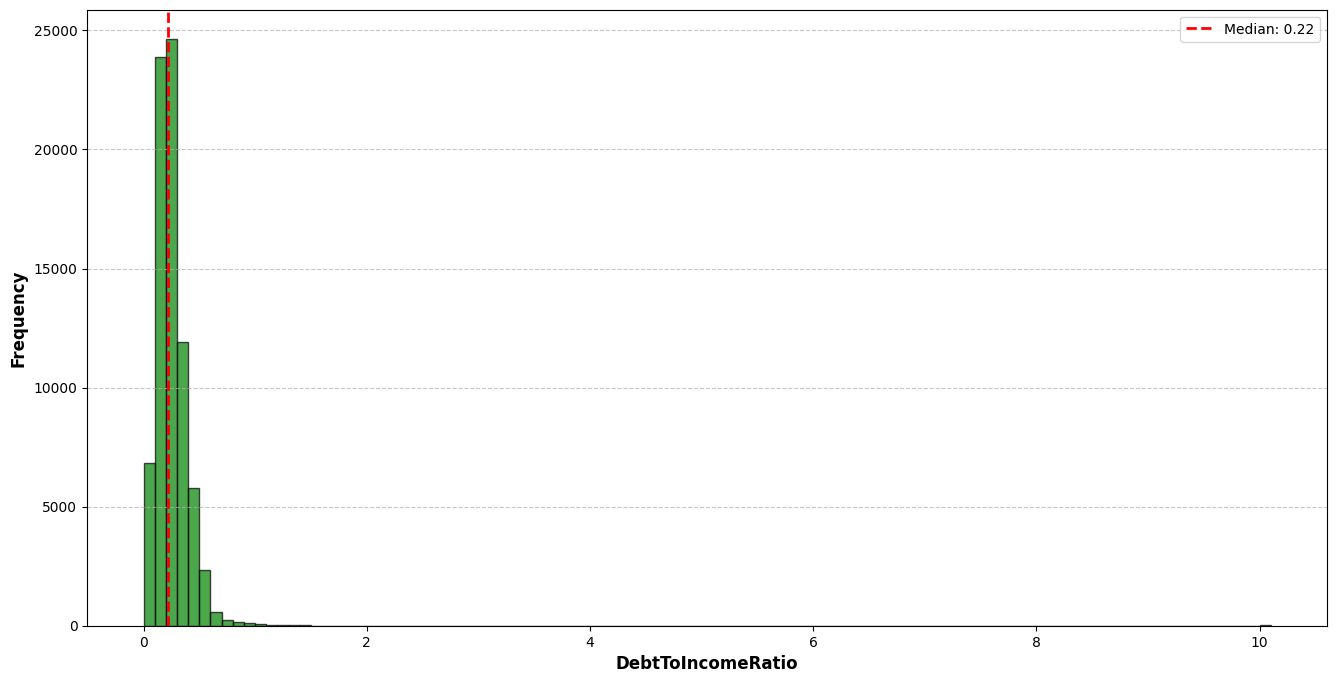

In [45]:
HistGraph(df_info, 'DebtToIncomeRatio', 0.1)

In [46]:
df_info['DebtToIncomeRatio'].quantile(0.99)

0.72

In [47]:
x=df_info[df_info.DebtToIncomeRatio==10.01]
print('There are {} data entry with DebtToIncomeRatio = 10.01'.format(x.shape[0]))

There are 46 data entry with DebtToIncomeRatio = 10.01


>- As you can see from the figure above, most (99%) DebtToIncomeRatio are within 1.
>- There are 46 data inputs, Max DebtToIncomeRatio = 10.01 (should not be human error)
>- We'll look at most of the data on debt-to-income ratios

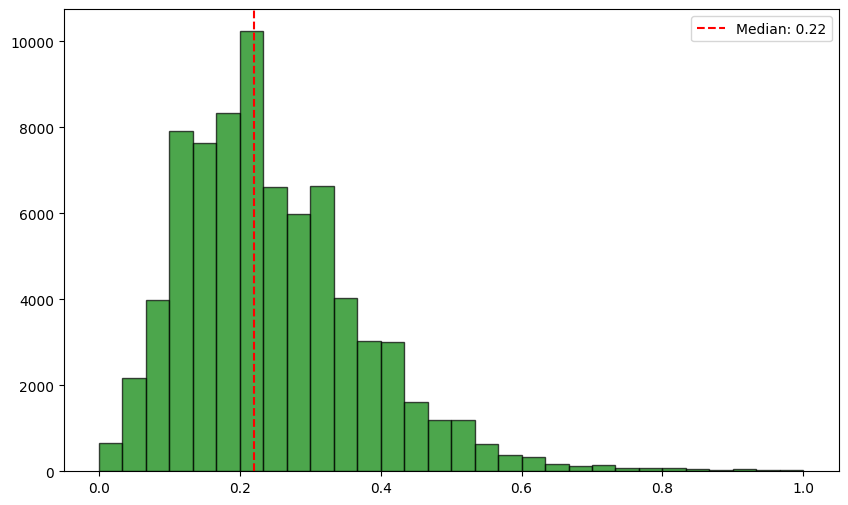

In [48]:
fig, ax = plt.subplots(figsize=[10,6])
ax.hist(df_info['DebtToIncomeRatio'], range=(0,1),
        bins=30, edgecolor='black', color='Green', alpha=0.7)
median=df_info['DebtToIncomeRatio'].median()
plt.axvline(df_info['DebtToIncomeRatio'].median(), color='red', linestyle='--', label=f'Median: {median:.2f}')

# Remove the legend
plt.legend().set_visible(True)

plt.show() 

>- Most debt-to-income ratios are below 50%, indicating that most borrowers have relatively low debt-to-income ratios. However, there are a few people who have higher debt incomes. A lower ratio is generally good for borrowers as it indicates their ability to effectively manage and repay the loan.



### OriginalLoanAmount

In [49]:
df_info.LoanOriginalAmount.describe()

count    76768.000000
mean      9248.961416
std       6389.782292
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

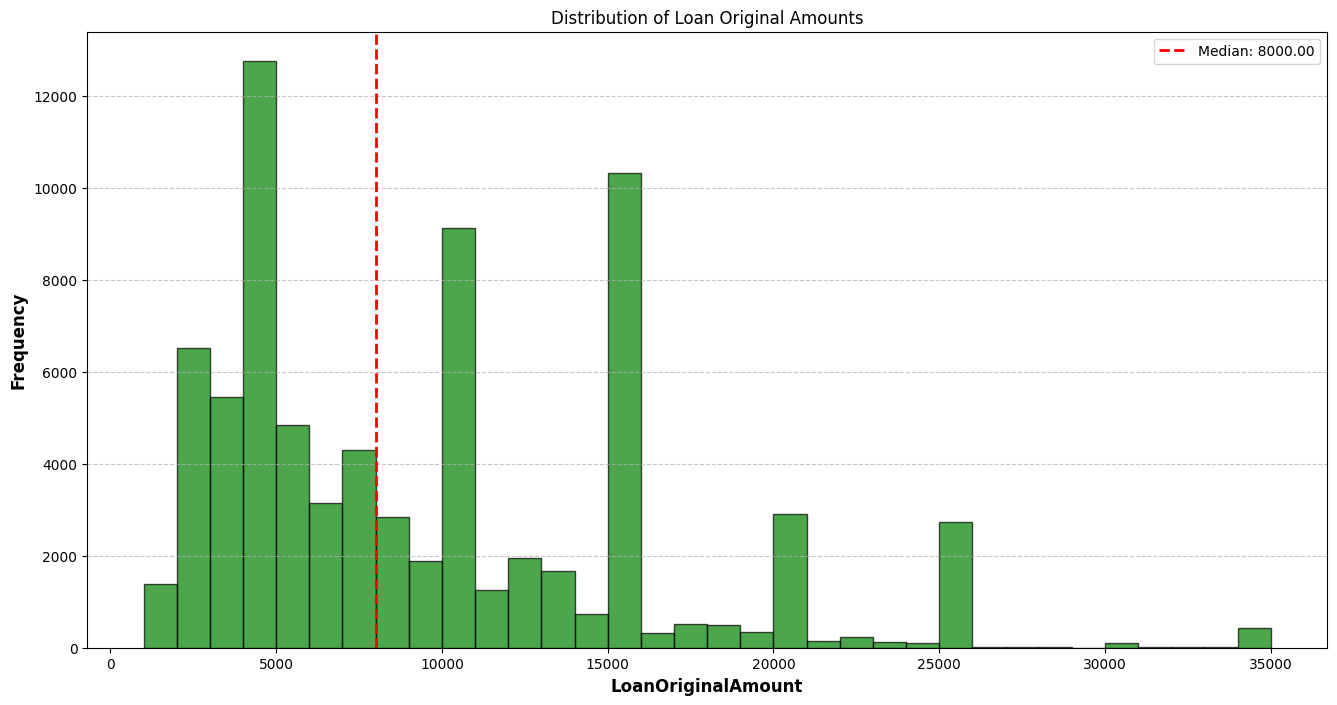

In [50]:
HistGraph(df_info, 'LoanOriginalAmount', 1000, title="Distribution of Loan Original Amounts")

>- The average original loan is around 9248, the largest is 35,000, the smallest is 1,000

### StatedMonthlyIncome

In [51]:
df_info.StatedMonthlyIncome.sort_values()

LoanKey
DCA9366929635721086C17C         0.250000
A2E63643277665696D47A5E         1.416667
DA623646827555431CA659F         1.833333
C9893607029050217F845B3         1.833333
B1D236532712404897E17A1         1.916667
                               ...      
1B313703263370099FC7B30    158333.333333
C6C536749708412328A7D15    394400.000000
B7F13618099831699F10189    416666.666667
5D0136156133365609F840F    466666.666667
77AC3617940949299F18FAF    483333.333333
Name: StatedMonthlyIncome, Length: 76768, dtype: float64

In [52]:
df_info.StatedMonthlyIncome.describe()

count     76768.000000
mean       5964.256138
std        5089.682309
min           0.250000
25%        3528.895833
50%        5000.000000
75%        7166.666667
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [53]:
df_info['StatedMonthlyIncome'].quantile(0.99)

20416.666667

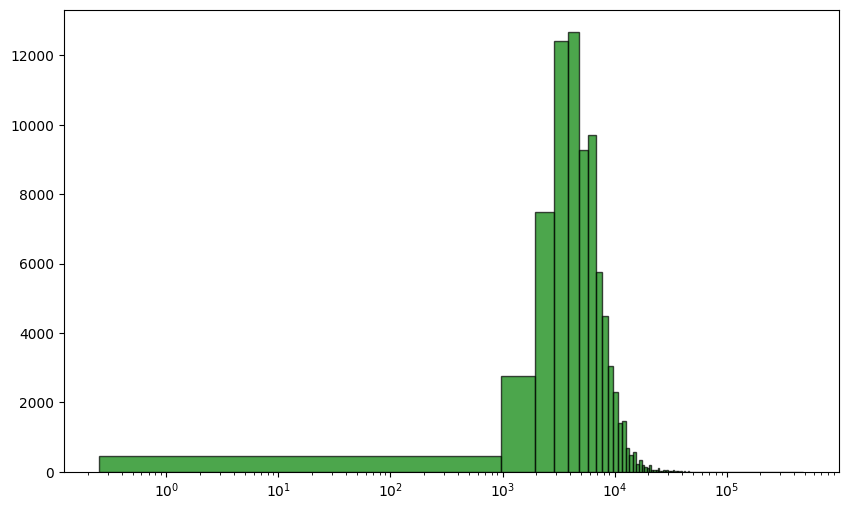

In [54]:
fig, ax = plt.subplots(figsize=[10,6])
ax.hist(df_info['StatedMonthlyIncome'],
        bins=500, edgecolor='black', color='Green', alpha=0.7)
plt.xscale('log')
plt.show() 

>- The average income is around 5,964.
>- 99% of the data is between 0 and 20526
>- The data is skewed to the right

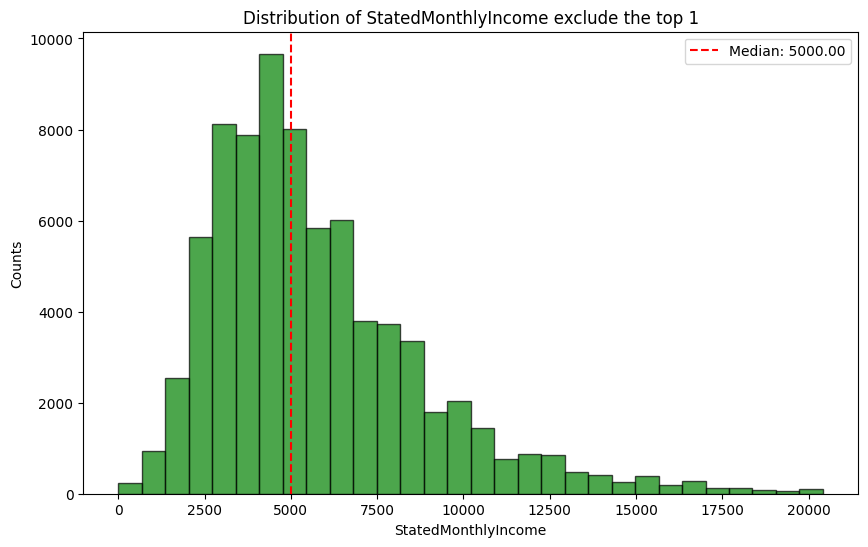

In [55]:
# Distribution of StatedMonthlyIncome exclude the top 1%
fig, ax = plt.subplots(figsize=[10,6])
ax.hist(df_info['StatedMonthlyIncome'], range=(0,df_info['StatedMonthlyIncome'].quantile(0.99)),
        bins=30, edgecolor='black', color='green', alpha=0.7)
# Add a vertical line at the median (50th percentile) in red
median=df_info['StatedMonthlyIncome'].median()
plt.axvline(df_info['StatedMonthlyIncome'].median(), color='red', linestyle='--', label=f'Median: {median:.2f}')

# Remove the legend
plt.legend().set_visible(True)
plt.title("Distribution of StatedMonthlyIncome exclude the top 1")
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Counts')
plt.show() 

>- Most borrowers have StatedMonthlyIncome below 10k
>- There was a peak just below 5k

### MonthlyLoanPayment

In [56]:
df_info.MonthlyLoanPayment.describe()

count    76768.000000
mean       295.275039
std        189.109061
min          0.000000
25%        158.330000
50%        256.120000
75%        392.010000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

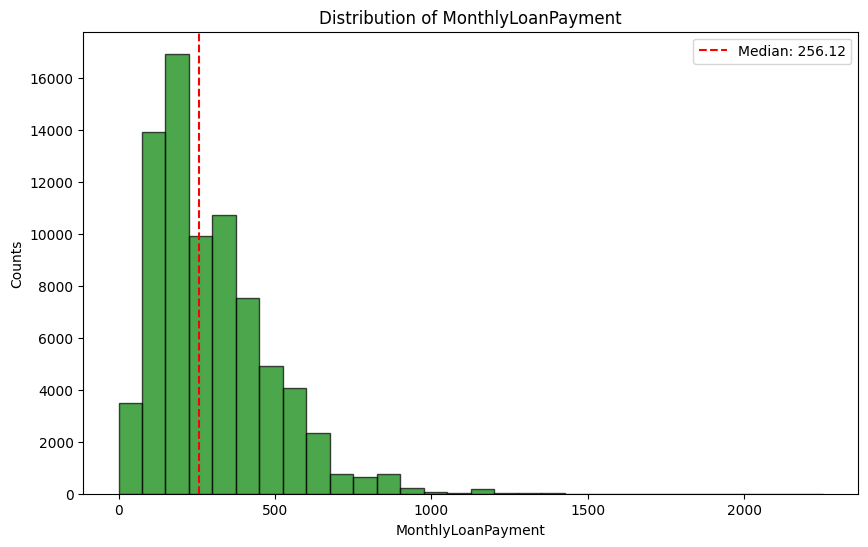

In [57]:
fig, ax = plt.subplots(figsize=[10,6])
ax.hist(df_info['MonthlyLoanPayment'],
        bins=30, edgecolor='black', color='Green', alpha=0.7)
# Add a vertical line at the median (50th percentile) in red
median=df_info['MonthlyLoanPayment'].median()
plt.axvline(df_info['MonthlyLoanPayment'].median(), color='red', linestyle='--', label=f'Median: {median:.2f}')

# Remove the legend
plt.legend().set_visible(True)
plt.title("Distribution of MonthlyLoanPayment")
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Counts')
plt.show() 

>- Most Monthlyloanpayments are between 100-400

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>- most (99%) DebtToIncomeRatio are within 1. There are 46 data inputs, Max DebtToIncomeRatio = 10.01,Given that there are 46 data entries, it should not be a human error, so I will not delete the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>- 99% of the data is between 0 and 20526,The data is skewed to the right.

## Bivariate Exploration

> Examine the relationships between basic features. For visualization purposes, I have divided the variables of interest into numerical and categorical categories.

In [58]:
# Separate the dataset into numeric and categorical features
numeric_features = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio',
                    'StatedMonthlyIncome', 'MonthlyLoanPayment', 
                    'LoanOriginalAmount']

categorical_features = ['Term', 'LoanStatus', 'EmploymentStatus', 
                        'IsBorrowerHomeowner', 'IncomeRange', 
                        'ProsperRating', 'ListingCategory']

### 1. Quantitative Vs. Quantitave

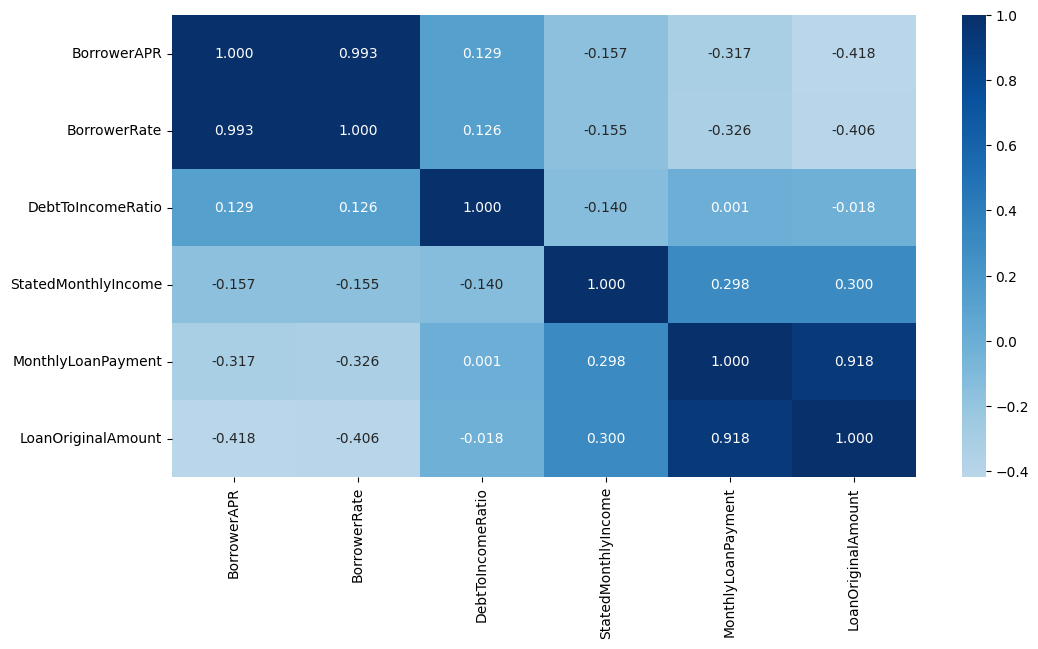

In [59]:
# Correlation plot for numeric features
plt.figure(figsize=[12, 6])

# Heatmap of the correlation matrix, annotating values.
sns.heatmap(df_info[numeric_features].corr(), annot=True, 
            fmt='.3f', center=0, cmap='Blues')

# Display the plot
plt.show()

In [ ]:
# Take a sample of 1000 loans to plot
samples = np.random.choice(df_info.index, 1000, replace=False)
loans_sample = df_info.loc[samples, :]

# Plot pairwise relationships between all the numeric variables of interest
sns.set_style("ticks")
g = sns.pairplot(data=loans_sample, vars=numeric_features, diag_kind='kde')

# Set the color to red for all the plots
for ax in g.axes.flat:
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('blue')
    ax.spines['left'].set_color('blue')
    ax.spines['right'].set_color('blue')
    ax.xaxis.label.set_color('blue')
    ax.yaxis.label.set_color('blue')

# Add a grid to the plots
g.map_upper(sns.scatterplot, color='blue')
g.map_lower(sns.scatterplot, color='blue')
g.map_diag(sns.histplot, color='blue')

plt.show()

>- There is a strong positive correlation between the borrower's annual interest rate and the borrower's interest rate, with a coefficient of 0.99
>- This is to be expected, as higher annual interest rates typically cause borrowers to pay more interest on their loans.
>- The borrower APR is negatively correlated with the original loan amount, with a coefficient of −0.32
>- The accompanying scatter plot visually confirms this negative association, showing that the APR tends to decline as the loan amount increases.
>- The original loan amount and the specified monthly income show a slight positive correlation, with a correlation coefficient of 0.30.
>- As the original amount of the loan increases, so does the monthly loan payment.

### 2. Quantitative and Qualitative

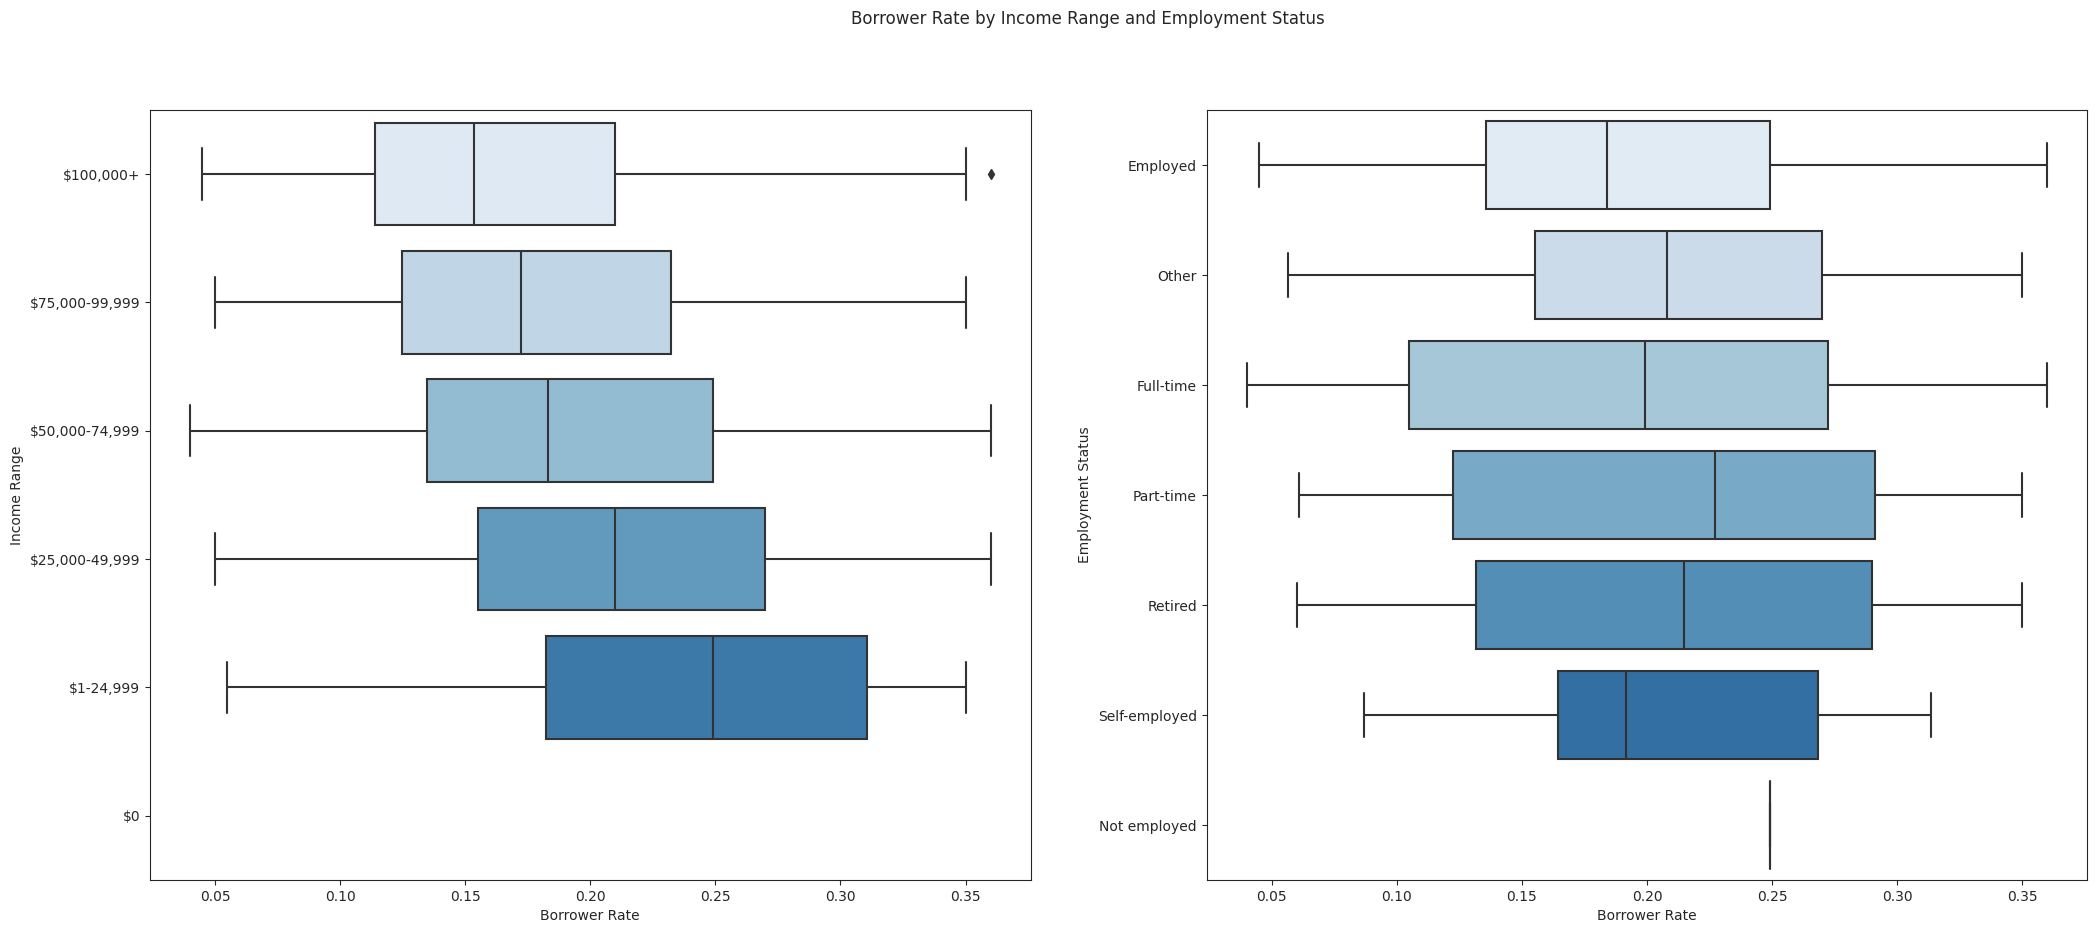

In [61]:
# Set a larger figure size for subplots
plt.figure(figsize=[25, 10])

# Subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(data=df_info, y='IncomeRange', x='BorrowerRate', palette='Blues')
plt.ylabel('Income Range')
plt.xlabel('Borrower Rate')

# Subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(data=df_info, y='EmploymentStatus', x='BorrowerRate', palette='Blues')
plt.ylabel('Employment Status')
plt.xlabel('Borrower Rate')

plt.suptitle('Borrower Rate by Income Range and Employment Status')
plt.show()

>- The box plot shows that the median borrower interest rate decreases as income taxes increase. Borrowers in the income range of 1-24,999k have the highest median interest rates.
>- Within the employment status category, borrowers in the "unemployed" group have the highest median interest rates, indicating that the unemployed tend to bear higher loan interest costs.

### 3. Qualitative and Qualitiative

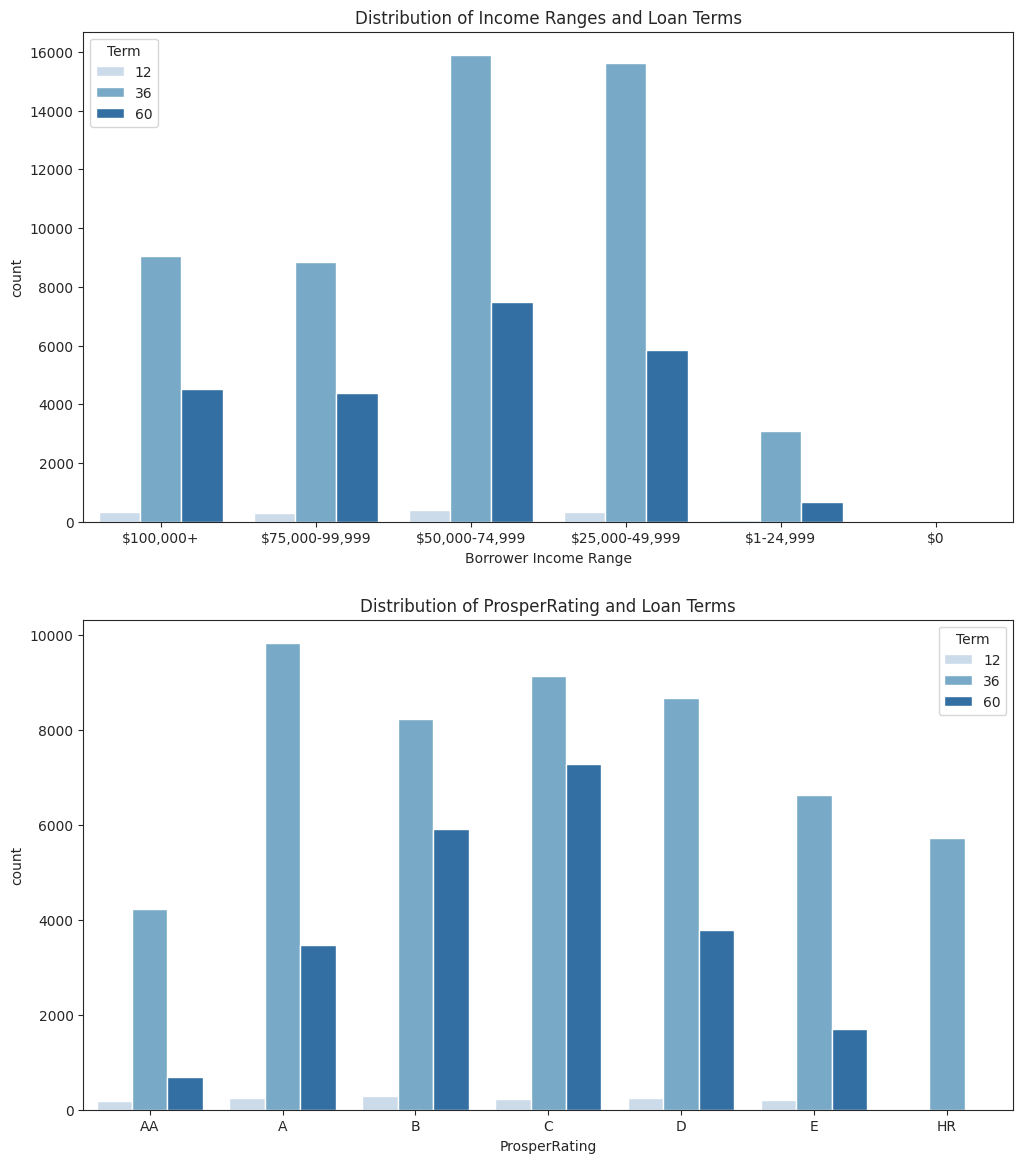

In [62]:
# Clustered bar chart of income range and loan term
plt.figure(figsize=[12, 14])

# Subplot 1: Income range and term distribution
plt.subplot(2, 1, 1)
sns.countplot(data=df_info, x='IncomeRange', hue='Term', palette='Blues')
plt.title('Distribution of Income Ranges and Loan Terms')
plt.xlabel('Borrower Income Range')

# Subplot 2: Prosper rating and term distribution
plt.subplot(2, 1, 2)
sns.countplot(data=df_info, x='ProsperRating', hue='Term', palette='Blues',order=order)
plt.title('Distribution of ProsperRating and Loan Terms')
plt.xlabel('ProsperRating');

>- Borrowers with income ranges from $50,000 - $74,999 mainly choose a 36-month loan term, followed by borrowers with income ranges from $25,000 - $49,999. 
>- Borrowers who do not report income primarily opt for a 36-month loan term.
>- In the prosperity rating category, B and C have a higher proportion of 60-month loans. 
>- In contrast, HR-rated borrowers only opt for a 36-month loan term, while A-rated borrowers also prefer a 36-month loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- There is a strong positive correlation between the borrower's annual interest rate and the borrower's interest rate, with a coefficient of 0.99
 , which is to be expected, as a higher APR usually causes borrowers to pay more interest on the loan.
>- The borrower's APR is inversely correlated with the original loan amount, with a coefficient of −0.32
 The accompanying scatter plot visually confirms this negative correlation, illustrating that the APR tends to decrease as the loan amount increases

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>- As the original amount of the loan increases, so does the monthly loan repayment (positive correlation).
>- The original amount of the loan and the stated monthly income showed a slight positive correlation with a correlation coefficient of 0.30 .
>- Borrowers with income ranges from  50,000−
 74,999 mainly choose a 36-month loan term, followed by borrowers with income ranges from  25,000−
 49,999.
 >- Notably, individuals classified as unemployed exhibit the highest median borrower interest rate, meaning they pay a higher interest rate on their loans.

## Multivariate Exploration

In [63]:
df_info.BorrowerAPR.describe()

count    76768.000000
mean         0.223978
std          0.079291
min          0.045830
25%          0.162590
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64

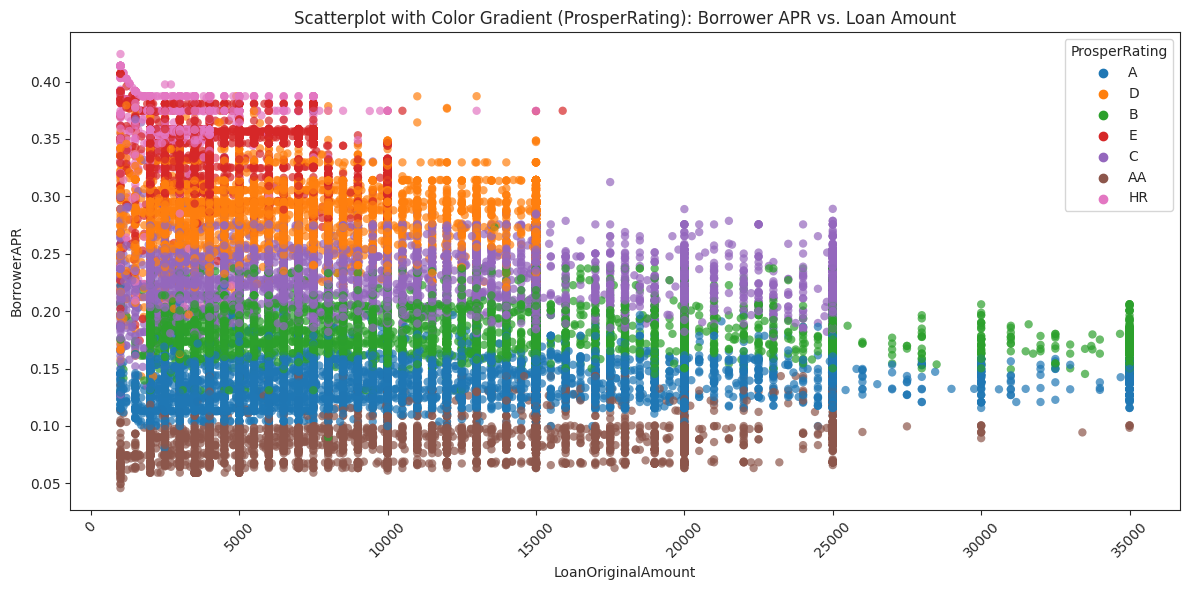

In [64]:
# Create a scatter plot to show the distribution of LoanOriginalAmount by BorrowerAPR (color: ProsperRating)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_info, x='LoanOriginalAmount', y='BorrowerAPR',hue='ProsperRating',
               alpha=0.7, edgecolor='none')

plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.title('Scatterplot with Color Gradient (ProsperRating): Borrower APR vs. Loan Amount')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

>- With the improvement of ProsperRating, the LoanOriginalAmount tends to increase.
>- As ProsperRating increases, borrowers typically have lower APRs.
>- With the improvement of ProsperRating, the correlation between LoanOriginalAmount and BorrowerAPR changes from negative to slightly positive.

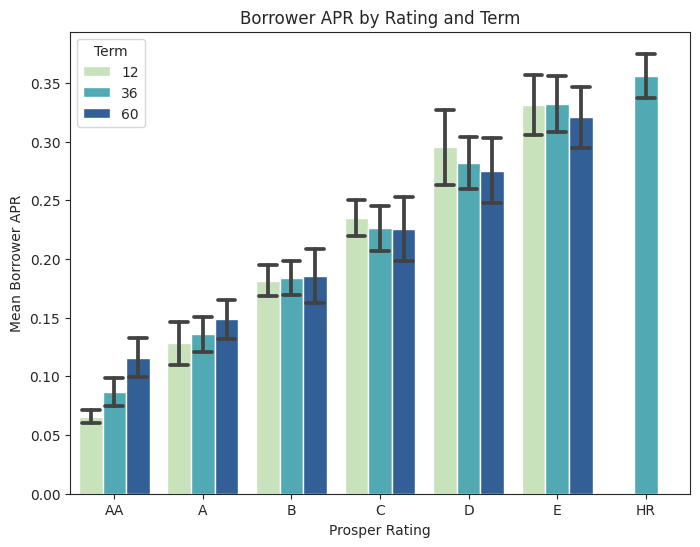

In [73]:
# Create a figure for the point plot
fig = plt.figure(figsize=[8, 6])

# Create a point plot to visualize Borrower APR across Prosper Rating and Loan Term
sns.barplot(data=df_info, x='ProsperRating', y='BorrowerAPR', hue='Term', order=order,
              palette='YlGnBu', errorbar='sd', capsize=0.2)

# Set the title and labels for the plot
plt.title('Borrower APR by Rating and Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Mean Borrower APR');

>- "Higher ProsperRating (AA-B)" experience increasing APRs as the "Term" extends.
>- Conversely, "lower ProsperRating (C-HR)" observe decreasing APRs as the "Term" extends.

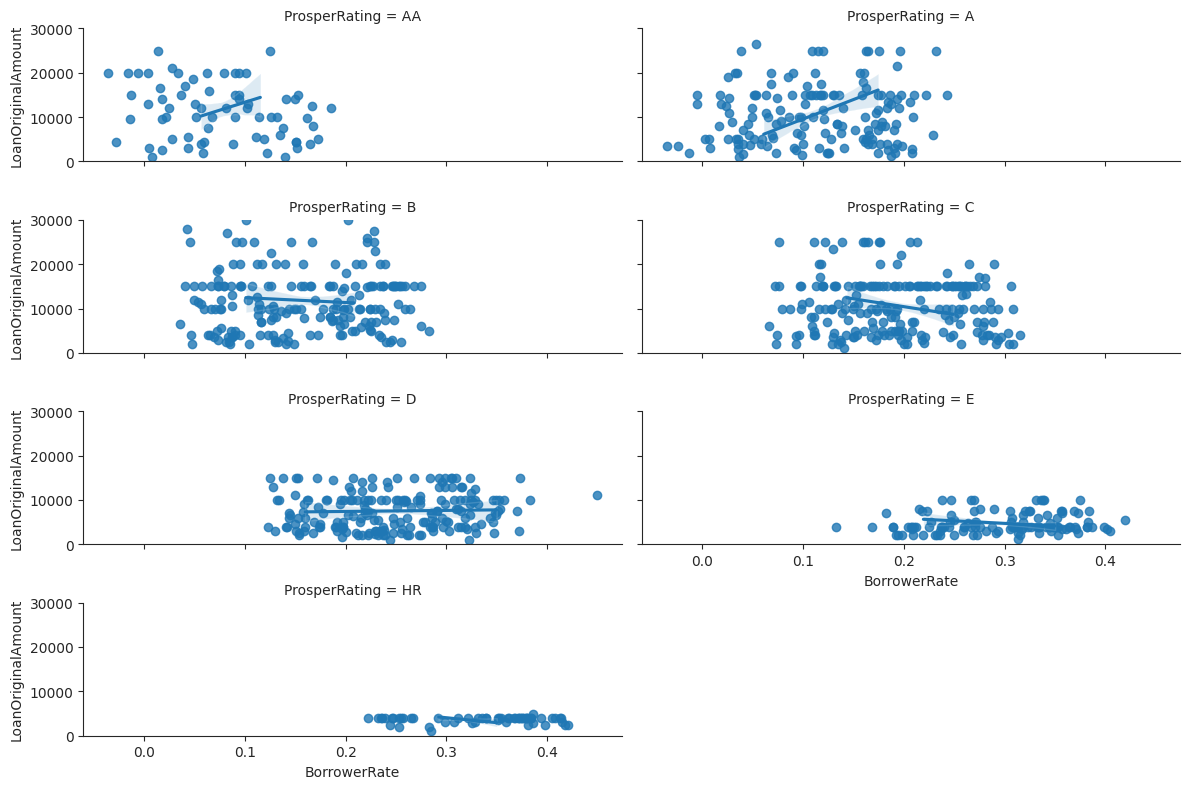

In [79]:
#Facet plot
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
random_sample = df_info.sample(n=1000)
g=sns.FacetGrid(data=random_sample,col="ProsperRating",col_order=rating_order,height=7, aspect=2,palette="green",col_wrap=2)
g=g.map(sns.regplot,"BorrowerRate","LoanOriginalAmount",x_jitter=0.1,fit_reg=True);
g.add_legend()
g.fig.set_size_inches(12,8)
g.fig.tight_layout()
plt.ylim(0,30000)
plt.ylabel("LoanOriginalAmount");
plt.xlabel("BorrowerRate");

>- It is found that ProsperRating means that the higher the original loan amount of AA and A, the higher BorrowerRate will be; the higher the original loan amount of B and C, the lower BorrowerRate will be; D, E, and HR will basically be the same, indicating that ProsperRating means that AA and A are at high risk. B and C attract lenders to make loans, while D, E and H are more stable loans

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- As borrowers have better ratings, we observe that loan amounts tend to increase while borrower APRs decrease. This indicates that borrowers with higher ratings get larger loans at more favorable interest rates.
>- An interesting pattern emerges when we analyze the relationship between loan tenure and APR specifically. It may seem counterintuitive for borrowers with excellent (AA-B) ratings to increase their APRs as the term of the loan increases. However, for lower-rated borrowers (C-HRs), APRs tend to decrease as the loan term increases. This suggests that the loan terms interact differently with the borrower's rating and may reflect a change in the lender's risk assessment.

### Were there any interesting or surprising interactions between features?

>- Notably, we found a negative correlation between BorrowerAPR and LoanOriginalAmount. This means that the associated APR tends to drop as borrowers request larger loan amounts. This observation could be significant for both lenders and borrowers, as it shows the potential benefits of borrowers seeking higher loan amounts at lower interest rates.
>- These relationships and interactions provide valuable insights into how borrower ratings, loan terms, loan amounts, and APRs correlate with each other, allowing for a more complete picture of loan dynamics in the dataset.

## Conclusions
>- There is a strong positive correlation between the borrower's annual interest rate and the borrower's interest rate, with a coefficient of 0.99
This is to be expected, as higher annual interest rates typically cause borrowers to pay more interest on their loans.
>- The borrower APR is negatively correlated with the original loan amount, with a coefficient of −0.32
The accompanying scatter plot visually confirms this negative association, showing that the APR tends to decline as the loan amount increases.
>- "Higher ProsperRating (AA-B)" experience increasing APRs as the "Term" extends.
>- Conversely, "lower ProsperRating (C-HR)" observe decreasing APRs as the "Term" extends.
>- As the ProsperRating increases, the borrower's APR is usually lower. 
>- As ProsperRating increases, the correlation between LoanOriginalAmount and BorrowerAPR changes from negative to slightly positive.




> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!



In [80]:
!python -m nbconvert --to html Part_I_exploration_template.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] Writing 2415490 bytes to Part_I_exploration_template.html
